In [1]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

In [2]:
param_grid = {
   'n_estimators': range(10, 80, 20),
   'max_depth': [2, 4, 6, 8, 10, 20],
   'min_samples_split': range(2, 8, 2),
   'max_features': ["auto", "sqrt", "log2"]
}

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, class_sep=0.8, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'train size - {len(X_train)}\ntest size - {len(X_test)}')

train size - 800
test size - 200


In [4]:
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV

nia_search = NatureInspiredSearchCV(
    clf,
    param_grid,
    cv=5,
    verbose=1,
    algorithm='ba',
    population_size=25,
    max_n_gen=100,
    max_stagnating_gen=10,    
    runs=5,
    scoring='f1_macro',
    random_state=42,
)

nia_search.fit(X_train, y_train)

Fitting 5 folds for some of the 216 candidates, which might total in 1080 fits
Run 1/5 finished
Run 2/5 finished
Run 3/5 finished
Run 4/5 finished
Run 5/5 finished
Optimization finished, 153 candidates were fitted (totalling 765 fits)


C:\Users\imanursar\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


NatureInspiredSearchCV(algorithm=None, cv=5, error_score=nan,
                       estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                             

In [5]:
from sklearn.metrics import classification_report

clf = RandomForestClassifier(**nia_search.best_params_, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8609    0.9167    0.8879       108
           1     0.8941    0.8261    0.8588        92

    accuracy                         0.8750       200
   macro avg     0.8775    0.8714    0.8733       200
weighted avg     0.8762    0.8750    0.8745       200



In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
#import xcode
import sys
sys.path.append('E:/gitlab/project_on_python/my_own_modul/visualization_and_description')
from ursar import visual, describe, model, fe , clustering, scoring

import numpy as np

C:\Users\imanursar\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\imanursar\AppData\Roaming\Python\Python37\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
%reload_ext autoreload

comfusion matrix = 
[[99  9]
 [16 76]]

accuracy_score =  0.875
balanced_accuracy_score =  0.8714

precision score =  0.8941
average precision score =  0.8186
recall score =  0.8261

F1 score =  0.8588
AUC of Precision-Recall Curve on Testing =  0.9001
AUC of ROC =  0.8714
Gini =  0.8002

Expected Approval Rate =  0.425
Expected Default Rate =  0.1059

classification_report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       108
           1       0.89      0.83      0.86        92

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200




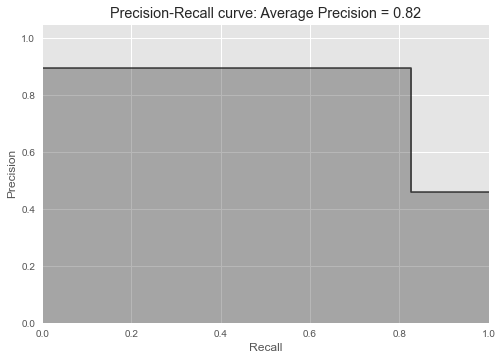

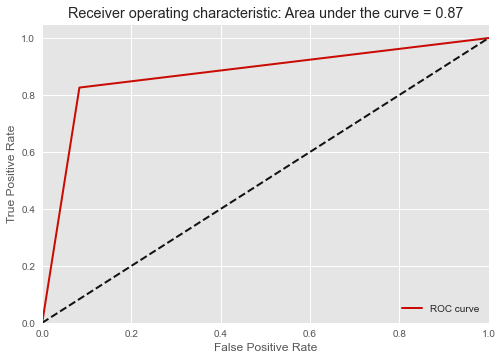


time span=  10


In [13]:
scoring.print_score(y_test,np.round(y_pred,4), y_pred, 10,20)

In [ ]:
from sklearn_nature_inspired_algorithms.helpers import score_by_generation_lineplot, score_by_generation_violinplot

# line plot will plot all of the runs, you can specify the metric to be plotted ('min', 'max', 'median', 'mean')
score_by_generation_lineplot(nia_search, metric='max')

# in violin plot you need to specify the run to be plotted
score_by_generation_violinplot(nia_search, run=0)